# Simulación de un circuito RLC

En este cuaderno-jupyter podras hallar el código **python** usado para simular un circuito RLC.

### Integrantes
* Romina Cárdenas
* Micael
* Gustavo Lozano Acuña

## Codigo Python

In [27]:
"""
Solucion de un sistema de odes(generado por un circuito rlc)
"""

import numpy as np
import matplotlib.pyplot as plt
from math import pi

def runge_kutta_sist(x0, f, h, a, b):
    """
    Resuelve el sistema de ecuaciones diferenciales
    x' = f(t, x), x(t) = [x1(t), x2(t), ..., xm(t)], donde xr(t): R-> R^{p}, p natural
    input:
        x0: valor de inicio (manteniendo la estructura de x(t))
        f: funcion vectorial (camino)
        a, b: cota inferior y superior (resp) del intervalo [a, b]
        h: tamaño de paso
    output:
        x = [x0, ..., xk, ... xn]: xk= aproximacion de la solucion del sistema de odes tk = a + k*h.  
    """

    t = np.arange(a, b, h)
    #x = np.array([x0])  # Solucion del sistema de odes
    x = np.ndarray((len(t), 2, 3))
    x[0] = x0

    for k, tk in enumerate(t[:len(t)-1]):
        k1 = f(tk , x[k])
        #aux2 = x[k]+h*k1/2
        k2 = f(tk + h/2, x[k]+h*k1/2)
        #aux3 = x[k]+h*k2/2
        k3 = f(tk + h/2, x[k]+h*k2/2)
        #aux4 = x[k]+h*k3
        k4 = f(tk + h, x[k]+h*k3)
        xx = x[k] + h*(k1+2*k2+2*k3+k4)/6 # xx = x_{k+1}
        x[k+1] = xx

    return t, x



def plot_current(t, i):
    
    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])
    
    plt.plot(t, i0, label="i0(t)")
    plt.plot(t, i1, label="i1(t)")
    plt.plot(t, i2, label="i2(t)")
    plt.title("RLC current")
    plt.legend()
    plt.grid()
    #plt.show()
    
    
def plot_capacitor_charge(t, q):
    
    q0 = np.array([qk[0] for qk in q])
    q1 = np.array([qk[1] for qk in q])
    q2 = np.array([qk[2] for qk in q])
    
    plt.plot(t, q0, label="q0(t)")
    plt.plot(t, q1, label="q1(t)")
    plt.plot(t, q2, label="q2(t)")
    plt.title("RLC charge")
    plt.legend()
    plt.grid()
    #plt.show()


    
    
def genera_funcion_sist(pulso, amp, period):
    if pulso == "sinusoidal":
        pulso_volt = lambda t: amp*np.sin(2*pi*t/period)
    elif pulso == "cuadrada":
        pass # definir el puso cuadrado
    elif pulso == "cierra":
        pass # definir el puso en forma de cierra
    
    
    def f(t, x, volt = pulso_volt):
        z = x[0, :]
        q = x[1, :]

        # definiendo g(t, z, q) = [g1, g2, g3]

        V = lambda t: volt(t) # Voltaje variable
        L1 = 1.0    # Asignar valor real del inductancia
        L2 = 1.0    # Asignar valor real del inductancia
        L3 = 1.0    # Asignar valor real del inductancia

        C1 = 1.0    # Asignar valor real de la capacitancia
        C2 = 1.0    # Asignar valor real de la capacitancia
        C3 = 1.0    # Asignar valor real de la capacitancia


        R1 = 1.0    # Asignar valor real de la resistencia
        R2 = 1.0    # Asignar valor real de la resistencia
        R3 = 1.0    # Asignar valor real de la resistencia

        #NOTA: qk = q[k-1]


        g1 = lambda t, z, q: V(t)/L1 - ((L1+L2)/(C1*L1*L2))*q[0] + 1/(L2*C2)*q[1] - R1/L1*z[0] - (L2/R2-L1/R1)*(z[1]+z[2])
        g2 = lambda t, z, q: q[0]/(L2*C1) - (L2+L3)/(C2*L2*L3)*q[1] + 1/(C3*L3)*q[2] - (R2/L2)*(z[1]+z[2])
        g3 = lambda t, z, q: q[1]/(L3*C2) - q[2]/(C3*L3) - (R3/L3)*z[2] 

        g = lambda t, z, q: np.array([g1(t, z, q), g2(t, z, q), g3(t, z, q)])

        f1 = lambda t, z, q: g(t, z, q)
        f2 = lambda t, z, q: z

        f = lambda t, z, q: np.array([f1(t, z, q), f2(t, z, q)])

        return f(t, z, q)
    
    return f

## Simulación

In [31]:
"""
Solucion de un sistema de odes(generado por un circuito rlc)
"""

import numpy as np
import matplotlib.pyplot as plt
from math import pi

def runge_kutta_sist(x0, f, h, a, b):
    """
    Resuelve el sistema de ecuaciones diferenciales
    x' = f(t, x), x(t) = [x1(t), x2(t), ..., xm(t)], donde xr(t): R-> R^{p}, p natural
    input:
        x0: valor de inicio (manteniendo la estructura de x(t))
        f: funcion vectorial (camino)
        a, b: cota inferior y superior (resp) del intervalo [a, b]
        h: tamaño de paso
    output:
        x = [x0, ..., xk, ... xn]: xk= aproximacion de la solucion del sistema de odes tk = a + k*h.  
    """

    t = np.arange(a, b, h)
    #x = np.array([x0])  # Solucion del sistema de odes
    x = np.ndarray((len(t), 2, 3))
    x[0] = x0

    for k, tk in enumerate(t[:len(t)-1]):
        k1 = f(tk , x[k])
        #aux2 = x[k]+h*k1/2
        k2 = f(tk + h/2, x[k]+h*k1/2)
        #aux3 = x[k]+h*k2/2
        k3 = f(tk + h/2, x[k]+h*k2/2)
        #aux4 = x[k]+h*k3
        k4 = f(tk + h, x[k]+h*k3)
        xx = x[k] + h*(k1+2*k2+2*k3+k4)/6 # xx = x_{k+1}
        x[k+1] = xx

    return t, x



def plot_current(t, i):
    
    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])
    
    plt.plot(t, i0, label="i0(t)")
    plt.plot(t, i1, label="i1(t)")
    plt.plot(t, i2, label="i2(t)")
    plt.title("RLC current")
    plt.legend()
    plt.grid()
    plt.show()
    
    
def plot_capacitor_charge(t, q):
    
    q0 = np.array([qk[0] for qk in q])
    q1 = np.array([qk[1] for qk in q])
    q2 = np.array([qk[2] for qk in q])
    
    plt.plot(t, q0, label="q0(t)")
    plt.plot(t, q1, label="q1(t)")
    plt.plot(t, q2, label="q2(t)")
    plt.title("RLC charge")
    plt.legend()
    plt.grid()
    plt.show()


    
    
def genera_funcion_sist(pulso, amp, period):
    if pulso == "sinusoidal":
        pulso_volt = lambda t: amp*np.sin(2*pi*t/period)
    elif pulso == "cuadrada":
        def pulso_volt(t): # definir el puso en forma de cuadrada
            return 1.0
    elif pulso == "cierra":
        def pulso_volt(t): # definir el puso en forma de cierra
            return 1.0
    
    def f(t, x, volt = pulso_volt):
        z = x[0, :]
        q = x[1, :]

        # definiendo g(t, z, q) = [g1, g2, g3]

        V = lambda t: volt(t) # Voltaje variable
        L1 = 1.0    # Asignar valor real del inductancia
        L2 = 1.0    # Asignar valor real del inductancia
        L3 = 1.0    # Asignar valor real del inductancia

        C1 = 1.0    # Asignar valor real de la capacitancia
        C2 = 1.0    # Asignar valor real de la capacitancia
        C3 = 1.0    # Asignar valor real de la capacitancia


        R1 = 1.0    # Asignar valor real de la resistencia
        R2 = 1.0    # Asignar valor real de la resistencia
        R3 = 1.0    # Asignar valor real de la resistencia

        #NOTA: qk = q[k-1]


        g1 = lambda t, z, q: V(t)/L1 - ((L1+L2)/(C1*L1*L2))*q[0] + 1/(L2*C2)*q[1] - R1/L1*z[0] - (L2/R2-L1/R1)*(z[1]+z[2])
        g2 = lambda t, z, q: q[0]/(L2*C1) - (L2+L3)/(C2*L2*L3)*q[1] + 1/(C3*L3)*q[2] - (R2/L2)*(z[1]+z[2])
        g3 = lambda t, z, q: q[1]/(L3*C2) - q[2]/(C3*L3) - (R3/L3)*z[2] 

        g = lambda t, z, q: np.array([g1(t, z, q), g2(t, z, q), g3(t, z, q)])

        f1 = lambda t, z, q: g(t, z, q)
        f2 = lambda t, z, q: z

        f = lambda t, z, q: np.array([f1(t, z, q), f2(t, z, q)])

        return f(t, z, q)
    
    return f

********** Bienvenido **********
Ingresa el intervalo [a, b] a analizar la señal.
Ingrese valor de a: 0
Ingrese valor de b: 20
Ingrese el tamaño del paso del retodo rk4: 0.001
Seleccione el pulso del voltaje
	a) Sinusoidal
	b) Cuadrada
	c) Cierra
	d) Exit
>>> a
Amplitud de la onda sinusoidal: 1.0
Periodo de la onda sinusoidal: 0.5


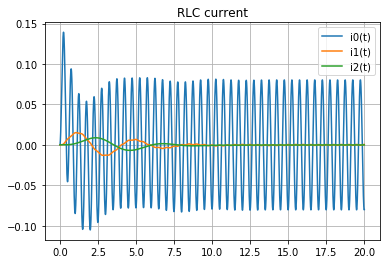

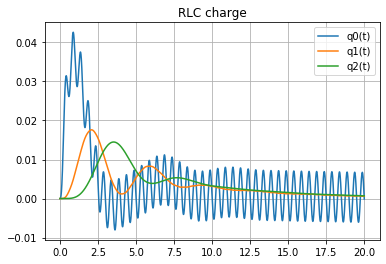

In [33]:
import sys

#NOTA: x0 = [z0, q0] = [q'(0), q(0)] = [i(0), q(0)], donde i = (i1, i2, i3) y q = (q1, q2, q3)
x0 = np.array([[0, 0, 0], [0, 0, 0]], dtype=np.double)

# [a, b] es el intervalo de tiempo en el cual se estara analizando el circuito

print("********** Bienvenido **********")
print("Ingresa el intervalo [a, b] a analizar la señal.")


a = float(input("Ingrese valor de a: "))   # Inicializar valor real
b = float(input("Ingrese valor de b: "))   # Inicializar valor real

while b < a:
    b = float(input("Ingrese valor de b (b > {}): ".format(a)))
    
    
h = float(input("Ingrese el tamaño del paso del retodo rk4: "))    # tamaño de paso en el metodo de runge-kutta

while h < 0 or h > abs(b-a):
    if h < 0:
        h = float(input("Tamaño del paso negativo!.Intente denuevo (paso positivo): "))
    else:
        h = float(input("Tamaño del paso muy grande.Intente denuevo (paso < {}): ".format(abs(b-a))))
    
print("Seleccione el pulso del voltaje")
print("\ta) Sinusoidal\n\tb) Cuadrada\n\tc) Cierra\n\td) Exit")
pulso = input(">>> ")
pulso.lower()
while pulso not in ['a', 'b', 'c', 'd', "sinusoidal", "cuadrada", "cierra", "exit"]:
    pulso = input("Opcion invalida. Intente denuevo.\n>>> ")
    pulso.lower()

if pulso == "exit":
    sys.exit(1)

if len(pulso) == 1:
    if pulso == "a":
        pulso = "sinusoidal"
        amp = float(input("Amplitud de la onda {}: ".format(pulso)))
        frec = float(input("Periodo de la onda {}: ".format(pulso)))
    elif pulso == "b":
        pulso = "cuadrada"
        amp = float(input("Amplitud de la onda {}: ".format(pulso)))
        frec = float(input("Periodo de la onda {}: ".format(pulso)))
    else:
        pulso = "cierra"
        amp = float(input("Amplitud de la onda {}: ".format(pulso)))
        frec = float(input("Periodo de la onda {}: ".format(pulso)))
else:
    amp = float(input("Amplitud de la onda {}: ".format(pulso)))
    frec = float(input("Periodo de la onda {}: ".format(pulso)))
    

f = genera_funcion_sist(pulso, amp, frec)    
    
# resolviendo el sistema de odes mediante rk4, x = [i, q]

t, x = runge_kutta_sist(x0, f, h, a, b)

i = np.array([xk[0] for xk in x])   # i = (i0, i1, i2)
q = np.array([xk[1] for xk in x])   # q = (q0, q1, q2)


plot_current(t,i)
plot_capacitor_charge(t, q)